<a href="https://colab.research.google.com/github/mehmetdogukanozer/isletimsistemlerioev/blob/main/isletimodevpart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Amdahl Yasası Yazılımı

--- Amdahl Yasası Hesaplayıcı ---
Uygulamanın seri (paralel olmayan) kısmını girin (%0-100 arası, örn: 25): 20

Seri Kısım Oranı (S): 0.2 (%20.0)
Çekirdek (N)    Hızlanma (Speedup)  
-----------------------------------
1               1.00x
2               1.67x
3               2.14x
4               2.50x
5               2.78x
6               3.00x
7               3.18x
8               3.33x
9               3.46x
10              3.57x
11              3.67x
12              3.75x
13              3.82x
14              3.89x
15              3.95x
16              4.00x

Teorik Maksimum Hızlanma (Limit): 5.0x
[Bilgi] N sonsuza yaklaşsa bile hızlanma 1/S değerini geçemez[cite: 115].


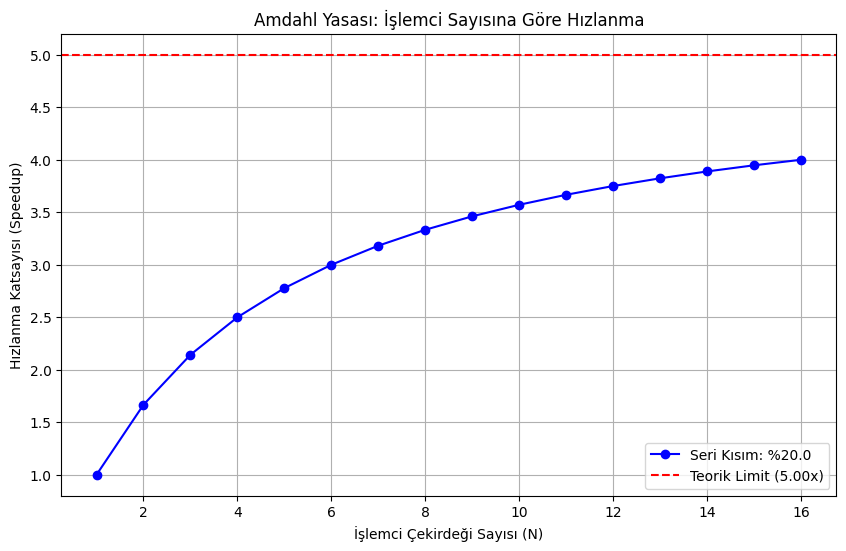

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def amdahl_law(s_ratio, n_cores):
    """
    s_ratio (S): Programın seri (paralelleştirilemeyen) kısmı (0.0 - 1.0 arası)
    n_cores (N): İşlemci çekirdeği sayısı
    """
    parallel_part = 1 - s_ratio
    speedup = 1 / (s_ratio + (parallel_part / n_cores))
    return speedup

def main():
    print("--- Amdahl Yasası Hesaplayıcı ---")

    try:
        # Kullanıcıdan seri kısmın yüzdesini alalım (Örn: %25 seri ise 0.25)
        seri_yuzde = float(input("Uygulamanın seri (paralel olmayan) kısmını girin (%0-100 arası, örn: 25): "))
        S = seri_yuzde / 100.0

        if not (0 <= S <= 1):
            print("Hata: Lütfen 0 ile 100 arasında bir değer girin.")
            return

        # 1'den 16 çekirdeğe kadar senaryoları test edelim
        cekirdek_sayilari = list(range(1, 17))
        hizlanmalar = [amdahl_law(S, n) for n in cekirdek_sayilari]

        # Sonuçları Yazdıralım
        print(f"\nSeri Kısım Oranı (S): {S} (%{seri_yuzde})")
        print(f"{'Çekirdek (N)':<15} {'Hızlanma (Speedup)':<20}")
        print("-" * 35)
        for n, speedup in zip(cekirdek_sayilari, hizlanmalar):
            print(f"{n:<15} {speedup:.2f}x")

        # Teorik Maksimum Hızlanma (N sonsuza giderken)
        max_hizlanma = 1 / S if S > 0 else "Sonsuz"
        print(f"\nTeorik Maksimum Hızlanma (Limit): {max_hizlanma}x")
        print("[Bilgi] N sonsuza yaklaşsa bile hızlanma 1/S değerini geçemez[cite: 115].")

        # Grafik Çizimi
        plt.figure(figsize=(10, 6))
        plt.plot(cekirdek_sayilari, hizlanmalar, marker='o', linestyle='-', color='b', label=f'Seri Kısım: %{seri_yuzde}')

        # Limit çizgisini ekle
        if isinstance(max_hizlanma, float):
            plt.axhline(y=max_hizlanma, color='r', linestyle='--', label=f'Teorik Limit ({max_hizlanma:.2f}x)')

        plt.title("Amdahl Yasası: İşlemci Sayısına Göre Hızlanma")
        plt.xlabel("İşlemci Çekirdeği Sayısı (N)")
        plt.ylabel("Hızlanma Katsayısı (Speedup)")
        plt.grid(True)
        plt.legend()
        plt.show()

    except ValueError:
        print("Lütfen geçerli bir sayısal değer girin.")

if __name__ == "__main__":
    main()

Amdahl Yazılımının Analizi:

Bu kod, sunumdaki örneği (%25 seri kısım) girdiğinizde, 2 çekirdek için 1.6x, 4 çekirdek için 2.28x sonuçlarını vererek sunumdaki verileri doğrular.

Grafikte göreceğiniz üzere, çekirdek sayısı (N) artsa bile, eğri bir noktadan sonra düzleşmeye başlar. Bu, sunumda bahsedilen "seri bölümün, ek işlemci gücünün yarattığı pozitif etkiyi kısıtlaması" ilkesidir.